### （熵最好理解为不确定性的量度而不是确定性的量度，因为越随机的信源的熵越大。）在信息论里面，熵是对不确定性的测量。但是在信息世界，熵越高，则能传输越多的信息，熵越低，则意味着传输的信息越少。
### 如果有一枚理想的硬币，其出现正面和反面的机会相等，则抛硬币事件的熵等于其能够达到的最大值。如果一枚硬币的两面完全相同，那个这个系列抛硬币事件的熵等于零，因为结果能被准确预测。现实世界里，我们收集到的数据的熵介于上面两种情况之间。

In [35]:
from math import log

def calcShannonEnt(dataSet):  # 计算香农熵
    numEntries = len(dataSet)  # 计算项的数目  计算数据集中实例的总数
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():  # 如果当前键值不在，扩展字典  !!!'dict' object has no attribute 'key'
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1    # 记录键值当前类别出现的次数
        shannonEnt = 0.0
        for key in labelCounts:
            prob = float(labelCounts[key])/numEntries
            shannonEnt -= prob * log(prob,2)
        return shannonEnt  # 熵越大， 则混合的数据越多
# 0.46438561897747244

In [36]:
def createDataSet():
    myData = [[1,1,'yes',],
          [1,1,'yes'],
          [1,0,'no'],
          [0,1,'no'],
          [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    #print(len(myData))
    return myData,labels
mydata,mylables = createDataSet()
print(mydata)
res = calcShannonEnt(mydata)
print(res) # 0.46438561897747244

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.46438561897747244


In [37]:
# 源代码
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    # change to discrete values
    return dataSet, labels

mydata,labels = createDataSet()
print(mydata)
res1 = calcShannonEnt(mydata)
print(res1)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.46438561897747244


In [38]:
outlook = [[1,1,0,0,0,'sunny'],[1,1,1,1,'overcast'],[1,1,1,0,0,'rainy']]
humidity = [[1,1,1,0,0,0,0,'high'],[1,1,1,1,1,1,0,'normal']]
windy = [[1,1,1,1,1,1,0,0,'false'],[1,1,1,0,0,0,'true']]
tem = [[1,1,0,0,'hot'],[1,1,1,1,0,0,'mild'],[1,1,1,0,'cool']]
res1 = calcShannonEnt(outlook)
res2 = calcShannonEnt(humidity)
res3 = calcShannonEnt(windy)
res4 = calcShannonEnt(tem)
print(res1)
print(res2)
print(res3)
print(res4)

0.5283208335737187
0.5
0.5
0.5283208335737187


### 3-1计算给定数据集的香农熵

In [39]:
from math import log

def calcShannonEnt(dataSet):  # 计算香农熵
    numEntries = len(dataSet)  # 计算项的数目  计算数据集中实例的总数
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():  # 如果当前键值不在，扩展字典  !!!'dict' object has no attribute 'key'
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1    # 记录键值当前类别出现的次数
        shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt  # 熵越大， 则混合的数据越多

In [40]:
# 测试3-1
def createDataSet():
    myData = [[1,1,'yes'],
          [1,1,'yes'],
          [1,0,'no'],
          [0,1,'no'],
          [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return myData,labels
mydata,mylables = createDataSet()
res = calcShannonEnt(mydata)
print(res)

0.9709505944546686


### 3-2划分数据集


In [41]:
def splitDataSet(dataSet, axis, value):  # axis:划分数据集特征，表现为列表的第axis个元素
    retDataSet = []
    for featVec in dataSet:  # 循环特征向量
        if featVec[axis] == value:   # 发现符合要求的值，则将它添加到新的列表中
            reducedFeatVec = featVec[:axis]   # 截取前 axis 个元素
            reducedFeatVec.extend(featVec[axis+1:])  # 这个向量和最初的向量的差别就是——该向量缺少第 axis 个元素
            retDataSet.append(reducedFeatVec)
    return retDataSet  # 返回 按照某个特征（axis）的划分数据

In [42]:
# 测试 3-2
def createDataSet():
    myData = [[1,1,'yes'],
          [1,1,'yes'],
          [1,0,'no'],
          [0,1,'no'],
          [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    #print(len(myData))
    return myData,labels
mydata,mylables = createDataSet()
#print(mydata)
#res1 = splitDataSet(mydata, 0, 0)  # [[1, 'no'], [1, 'no']]
#res1 = splitDataSet(mydata, 1, 1)  #[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
#res1 = splitDataSet(mydata, 1, 0)  # [[1, 'no']]
res1 = splitDataSet(mydata, 0, 1)  
print(res1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]


### 3-3选择最好的数据集划分方式

In [43]:
def chooseBestFeatureToSplit(dataSet):  # 选择最好的数据集划分方式
    #numFeatures = len(dataSet)  #  numFeatures = 5    !!!!!!!!!!!!!!!!!! 此行错误
    numFeatures = len(dataSet[0]) - 1   # 特征属性的数量应该是实例的维数-1 （-1是除去结果——最终类别判定）
    baseEntropy = calcShannonEnt(dataSet)  # 计算数据集的原始香农熵
    bestInfoGain = 0.0  
    bestFeature = -1
    for i in range(numFeatures):   # numFeatures = 2
        featList = [example[i] for example in dataSet]   # 抽取 |每个实例的 第 numFeatures 个特征属性|  构成新的列表
        uniqueVals = set(featList)  # 独一无二的属性值（元素） ——使用集合除去重复的值
        newEntropy = 0.0  
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)  # 调用splitDataSet（）函数
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [44]:
# 测试 3-3
def createDataSet():
    myData = [[1,1,'yes'],
          [1,1,'yes'],
          [1,0,'no'],
          [0,1,'no'],
          [1,0,'no']]
    labels = ['no surfacing', 'flippers']
    return myData,labels
mydata,mylables = createDataSet()
res2 = chooseBestFeatureToSplit(mydata)
print(res2)

1


### 3-4 创建树的函数代码

In [45]:
import operator
def majorityCnt(classList):  # 作用：解决 |数据集已经处理了所有属性，但类标签依然不唯一| 的情况
    classCount = { }
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [46]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]  # 类别都是一样的话，返回类别并停止划分
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)  # 返回出现次数最多的类别
    bestFeat = chooseBestFeatureToSplit(dataSet) # 调用 chooseBestFeatureToSplit（）找最好的特征（属性）
    bestFeatLabel = labels[bestFeat]  # 最好特征（属性） 对应的即为 最好的特征标签
    myTree = { bestFeatLabel:{ } }
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]  # 由最好的特征（属性） 构成 最好特征值 列表
    uniqueVals = set(featValues)  # 去重复化
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels) # 此处是 递归操作
    return myTree

In [47]:
# 测试 3-4
def createDataSet():
    myData = [[1,1,'yes'],
          [1,1,'yes'],
          [1,0,'no'],
          [0,1,'no'],
          [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return myData,labels
mydata,mylabels = createDataSet()
#res1 = splitDataSet(mydata, 0, 1)   # [[1, 'yes'], [1, 'yes'], [0, 'no']]
#print(res1)
res1 = splitDataSet(mydata, 0, 0)
myTree = createTree(mydata, mylabels)
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


### 3-5 使用文本注解绘制树节点
#### Matplotlib提供一个非常有用的注解工具annotations,它可以在数据图形上添加文本注解。

In [48]:
import matplotlib.pyplot as plt  # 注释：字典形式的树结构不易于理解，故   这里用 Matplotlib库创建树（决策树的主要优点就是直观）

decisionNode = dict(boxstyle="sawtooth",fc="0.8")  # {'boxstyle': 'sawtooth', 'fc': '0.8'}
leafNode = dict(boxstyle="round4",fc="0.8")  # {'boxstyle': 'round4', 'fc': '0.8'}
arrow_args = dict(arrowstyle="<-")  # {'arrowstyle': '<-'}

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.axl.annotate(nodeTxt, xy=parentPt,\
                            xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',\
                           va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)   # ??????????

#def createPlot():  #          :: 第一个版本的createPlot（）
#    fig = plt.figure(1, facecolor='white')  # 创建一个新的图形
#    fig.clf()  # 清空绘图区
#    createPlot.axl = plt.subplot(111, frameon=False)
#    plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

### 3-6 获取叶节点的数目和树的层数
#### 说明了如何在Python字典类型中存储树信息

In [49]:
def getNumLeaf(myTree):  # 知道有多少个叶节点， 以便可以正确确定x轴的长度
    numLeafs = 0
    firstStr = list(myTree.keys())[0]     # 第一个关键字是第一次划分数据集的类别标签  ——  附带的数值表示  子节点 的取值
    secondDict = myTree[firstStr]
    for key in secondDict.keys():   
        if type(secondDict[key]).__name__=="dict":   # 判断子节点是字典类型，是  ——  节点是一个判断节点，递归
            numLeafs += getNumLeaf(secondDict[key])
        else:  # 否  ——  子节点
            numLeafs += 1
    return numLeafs   # 返回 累计叶子节点的个数

def getTreeDepth(myTree):  # 知道树有多少层， 以便正确确定y轴的高度
    maxDepth=0
    firstStr = list(myTree.keys())[0]  # 'dict' object has no attribute 'key'   #  'dict_keys' object does not support indexing
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

### 3-7 plotTree函数

In [51]:
def plotMidText(cntrPt, parentPt, txtString):   # 在父子节点间填充文本信息
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.axl.text(xMid,yMid,txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeaf(myTree)   # 计算树的叶节点，  以确定x轴的长度
    depth = getTreeDepth(myTree)  # # 计算树的深度，  以确定y轴的长度
    # firstStr = myTree.keys()[0]  # use in Python2.7
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    
    
    plotMidText(cntrPt, parentPt, nodeTxt)   # 标记子节点属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    
    
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD  # 减少y偏移    ：：追踪已经绘制的节点位置
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":
            plotTree(secondDict[key],cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):   # 创建绘图区—— 计算树形图的全局尺寸 —— 调用递归函数plotTree（）
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.axl = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeaf(inTree))  # 树的宽度
    plotTree.totalD = float(getTreeDepth(inTree))  # 树的深度
    plotTree.xOff = -0.5/plotTree.totalW   # x偏移
    plotTree.yOff = 1.0  # y偏移
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

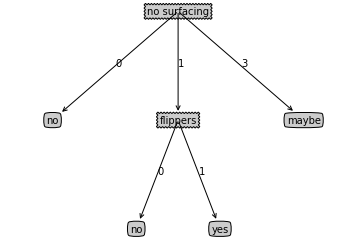

In [53]:
# 测试 3-7
# mytree = retrieveTree(0)
# createPlot(mytree)   # 见  书上   P48   效果图
mytree['no surfacing'][3] = 'maybe'
# print(mytree)  {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}
createPlot(mytree)

### 3-8 使用决策树的分类函数

In [54]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict= inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=="dict":
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [55]:
myData,labels = createDataSet()
print(labels)  # ['no surfacing', 'flippers']
myTree = retrieveTree(0)
print(myTree)  # {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
cla1 = classify(myTree,labels,[1,0])
cla2 = classify(myTree,labels,[1,1])
print("cla1 = %s, cla2 = %s" % (cla1,cla2))

['no surfacing', 'flippers']
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
cla1 = no, cla2 = yes


### 3-9 使用pickle模块存储决策树

In [56]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename,'wb')  # 'w'  --> 'wb'
    pickle.dump(inputTree, fw)  # TypeError: write() argument must be str, not bytes

    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename,'rb') # open(filename)  --> open(filename, 'rb')
    return pickle.load(fr)  # UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 0: illegal multibyte sequence

# 示例：使用决策树预测隐形眼镜类型

{'tearRate': {'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'presbyopic': 'no lenses', 'pre': 'no lenses', 'young': 'hard'}}}}, 'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'pre': 'soft', 'young': 'soft'}}}}, 'reduced': 'no lenses'}}


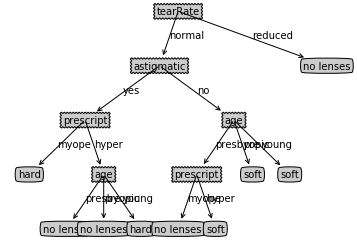

In [59]:
fr = open('lenses.txt')  #  绝对路径 C:/Users/DELL/PythonFolder/lenses.txt    如果路径不对的话可以尝试 绝对路径  
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
print(lensesTree)
createPlot(lensesTree)

In [ ]:
# 测试 3-6
def retrieveTree(i):
    listOfTree = [{'no surfacing':{0:'no',1:{'flippers':\
                    {0:'no',1:'yes'}}}},
                  {'no surfacing':{0:'no',1:{'flippers':\
                    {0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
                  ]
    return listOfTree[i]

retrieveTree(1)
mytree = retrieveTree(0)
leaf = getNumLeaf(mytree)
depth = getTreeDepth(mytree)
print(leaf)
print(depth)
createPlot(mytree)  # 书上   P48   效果图

In [ ]:
storeTree(myTree,'classifierStorage.txt')
grabTree('classifierStorage.txt')